In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
model = tf.keras.models.load_model("predict_DiseaseNew.keras")

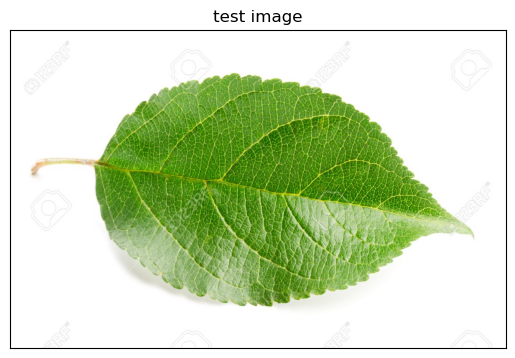

In [3]:
import cv2
img_path = "test/apple healthy1.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
image = tf.keras.preprocessing.image.load_img(img_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [5]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 239ms/step


(array([[3.60347641e-09, 5.47104229e-09, 2.12252431e-07, 2.07350149e-06,
         3.67515922e-01, 2.51697085e-09, 3.23328520e-09, 8.79109427e-02,
         1.11577610e-05, 1.37110831e-12, 7.89187644e-14, 2.63077633e-11,
         1.30365337e-11, 1.55257274e-09, 6.49038157e-10, 4.66438166e-10,
         2.88266833e-09, 2.38968951e-08, 1.17466004e-09, 1.22554178e-09,
         6.64684521e-08, 2.58817778e-07, 1.56192795e-10, 1.49912416e-09,
         1.21590028e-05, 2.91936785e-01, 4.24869404e-06, 6.36985265e-09,
         9.30545596e-09, 2.52440572e-01, 3.12973505e-08, 3.41231932e-10,
         5.54021312e-07, 2.20774226e-08, 8.91335432e-08, 2.62563208e-06,
         4.50716842e-09, 6.17388807e-08, 7.56024843e-09, 1.03494724e-08,
         2.94288416e-09, 1.74842416e-08, 1.85733427e-07, 1.05232575e-04,
         7.26057259e-09, 3.17905651e-05, 2.47971511e-05, 2.03197615e-07]],
       dtype=float32),
 (1, 48))

In [6]:
result_index = np.argmax(prediction)
result_index

4

In [7]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Cinnamon healthy',
 'Cinnamon leaf spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tea algal leaf',
 'Tea antrhacnose',
 'Tea bird eye spot',
 'Tea brown blight',
 'Tea gray light',
 'Tea healthy',
 'Tea red leaf spot',
 'Tea white spot',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

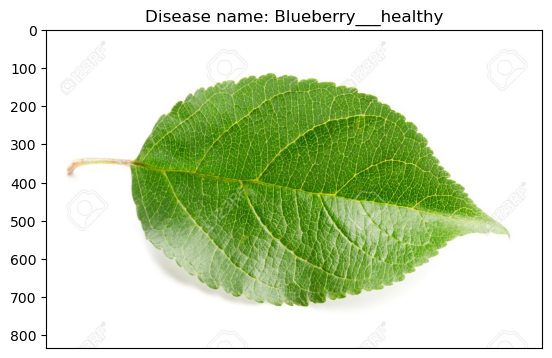

In [8]:
modelPrediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease name: {modelPrediction}")
plt.xticks([])
plt.yticks()
plt.show()

In [31]:
modelPrediction

'Tomato___healthy'

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
 f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\piyum\AppData\Local\Temp\tmpmguiv58o\assets


INFO:tensorflow:Assets written to: C:\Users\piyum\AppData\Local\Temp\tmpmguiv58o\assets
